# Abalone UCI
### Predicting the age of abalone from physical measurements.  

***

## Contexto

El abulón es el nombre común de un grupo de caracoles marinos de pequeño a gran tamaño, que se encuentran habitualmente en las costas de todo el mundo y se utilizan como manjar en las cocinas. Su concha sobrante se utiliza en joyería debido a su brillo iridiscente. 

Debido a su demanda y valor económico, a menudo se recolecta en granjas, por lo que es necesario predecir la edad del abalón a partir de medidas físicas. El método tradicional para determinar su edad consiste en cortar la concha a través del cono, teñirla y contar el número de anillos a través de un microscopio, una tarea aburrida y que requiere mucho tiempo, por lo que predecir la edad utilizando otros factores como el peso o la altura que se pueden medir fácilmente agilizaría el proceso.

Sabemos que a medida que el abalón crece añade anillos, y a medida que añade nuevas capas a la concha aumenta el peso y el diámetro de la misma. Se puede ver en la imagen de abajo:


<img src="abalone_rings.jpg" width="500" />

## Datos

Número de instancias: 4177

Número de atributos: 8

Objetivo: Anillos (Rings)

<img src="abalone_partes.jpg" width="500" />

| Atributo | Tipo de datos| Unidades | Descripción |
| :----: | :----: | :----: | :----: |
| Sex | nominal | - | M (masculino), F (femenino), I (infantes) | 
| Length | continuous | mm |  Longitud de la cáscara | 
| Diameter | continuous | mm | Perpendicular a la longitud | 
| Height | continuous | mm | Con carne en la cáscara | 
| Whole weight | continuous | grams | Abalón completo | 
| Shucked weight | continuous | grams | Peso de la carne |
| Viscera weight | continuous | grams | Peso de la tripa (después del sangrado) |
| Shell weight | continuous | grams | Después de ser secado |
| Rings | integer | - | +1.5 da la edad en años | 



## Primeros pasos

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats # Stats API
import seaborn as sns 
sns.set(style='whitegrid', palette='colorblind') 


from sklearn.linear_model import LinearRegression, LogisticRegression
#--------------------------
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
#---------------------------

In [2]:
df = pd.read_csv('abalone_original.csv')
df.dataframeName = 'abalone_original.csv'

In [3]:
df

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,F,113,90,33,177.4,74.0,47.8,49.8,11
4173,M,118,88,27,193.2,87.8,42.9,52.1,10
4174,M,120,95,41,235.2,105.1,57.5,61.6,9
4175,F,125,97,30,218.9,106.2,52.2,59.2,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   int64  
 2   diameter        4177 non-null   int64  
 3   height          4177 non-null   int64  
 4   whole-weight    4177 non-null   float64
 5   shucked-weight  4177 non-null   float64
 6   viscera-weight  4177 non-null   float64
 7   shell-weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

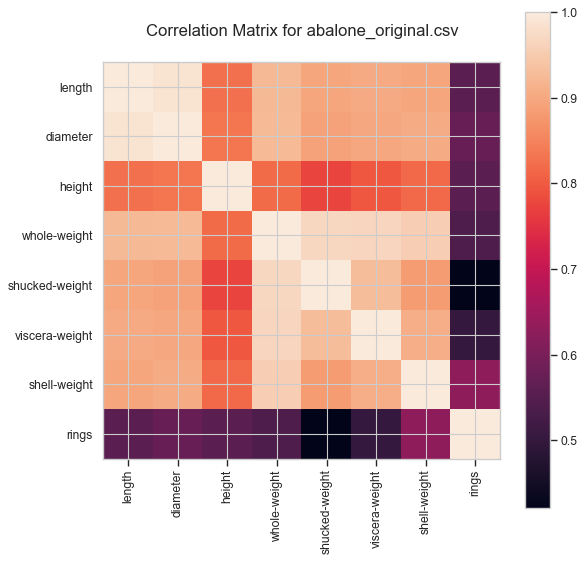

In [6]:
plotCorrelationMatrix(df, 8)

# Análisis de variables individuales

***

## Sexo

From the initial data description fields we know sex is categorized into Male, Female which makes sense, while Infant seems misclassified or was classified may be due to it's was hard to tell the sex at the time of observation since Abalone was Infant.

Let's first confirm the categories of Sex, we know it is 3, and which is the most frequent Sex found in this data set.

In [7]:
df.sex.describe()

count     4177
unique       3
top          M
freq      1528
Name: sex, dtype: object

We can confirm, sex only has 3 categories, mainly - Male, Female and Infant, with Male being the most frequent of them. Let's see their density, to understand by how much is Male greater than Female and Infant in this dataset.

In [8]:
df.sex.value_counts(normalize=True).sort_index()

F    0.312904
I    0.321283
M    0.365813
Name: sex, dtype: float64

So, their is significant more males than other two categories, let's visualize since Female and Infant are really close by using relative density to get a sense of their differences.

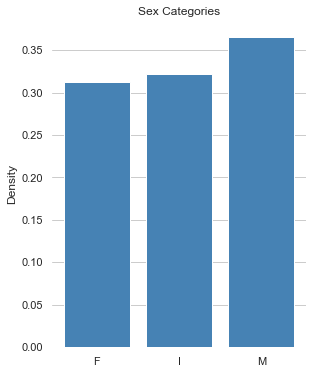

In [9]:
df_sex_category = df.sex.value_counts(normalize=True).sort_index()
x = range(len(df_sex_category))
figure = plt.figure(figsize=(10, 6))
axes1 = figure.add_subplot(1, 2, 1)
axes1.bar(x, df_sex_category, color="steelblue",align="center")
axes1.set_xticks(x)
# Set x axis tick labels
axes1.set_xticklabels(df_sex_category.axes[0])
# Set x and y axis chart label
axes1.set_title("Sex Categories")
axes1.set_ylabel("Density")
axes1.xaxis.grid(False)
# Remove all of the axis tick marks
axes1.tick_params(bottom=False, top=False, left=False, right=False)
# Hide all of the spines
for spine in axes1.spines.values():
    spine.set_visible(False)
axes1.yaxis.grid(b=True, which="major")

There are about equal proportions of Females and Infants, with slightly more Males, than either Females or Infants.

One thing we can notice, is presumably sex is much harder to recognize in infants and this is evident based on we have slightly higher infants than females.

## Longitud

Let's do a summary statistic to see how length is distributed, we expect it should follow normal distribution, with some skewness to it considering we have infants in the dataset.

In [10]:
df.length.describe()

count    4177.000000
mean      104.798420
std        24.018583
min        15.000000
25%        90.000000
50%       109.000000
75%       123.000000
max       163.000000
Name: length, dtype: float64

First thing to notice is mean is less than the median, so we would expect there to be left skewed distribution, and spread to be less as QCV is small.

Another thing to notice is min is really small so 15 mm, which makes sense due to Infants in the dataset, which may be why the distribution would have long left tail.

Let's visualize it with a box-plot to verify it, and see if their are any anomalies like outliers in length.



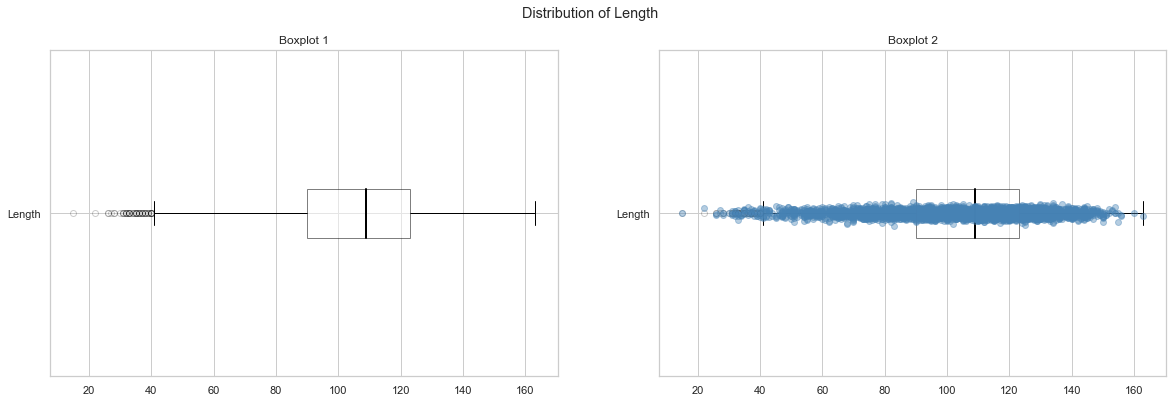

In [11]:
def restyle_boxplot(patch):
    # change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    # change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    # change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    # change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)

    for box in patch["boxes"]:
        box.set(facecolor='#FFFFFF', alpha=0.5)

def numeric_boxplot(numeric_df, label, title):
    figure = plt.figure(figsize=(20, 6))
    # Add Main Title
    figure.suptitle(title)
    # Left side: Boxplot 1
    axes1 = figure.add_subplot(1, 2, 1)
    patch = axes1.boxplot(numeric_df, labels=[label], vert=False, showfliers = True, patch_artist=True, zorder=1)
    restyle_boxplot(patch)
    axes1.set_title('Boxplot 1')
    # Right side: Boxplot 2
    axes2 = figure.add_subplot(1, 2, 2)
    patch = axes2.boxplot(numeric_df, labels=[label], vert=False, patch_artist=True, zorder=1)
    restyle_boxplot(patch)
    axes2.set_title('Boxplot 2')
    y = np.random.normal(1, 0.01, size=len(numeric_df))
    axes2.plot(numeric_df, y, 'o', color='steelblue', alpha=0.4, zorder=2)
    plt.show()
    plt.close()

numeric_boxplot(df.length, 'Length', 'Distribution of Length')

From Boxplot 1, which is IQR * 1.5 tells us, outliers exist between ranges of 20 to 40 which presumably is due to Infants presence or particular small species of abalone.

From Boxplot 2 we can see the distribution is indeed left skewed, and values are centered around 100-140 range.

Let's do a histogram to visualize the shape of the distribution, we can stick with default bin size for now.

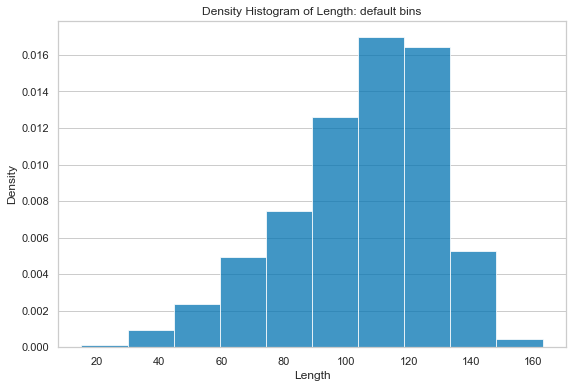

In [12]:
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 2)
axes.hist(df.length, density=True, alpha=0.75)
axes.set_title("Density Histogram of Length: default bins")
axes.set_ylabel("Density")
axes.set_xlabel("Length")
axes.xaxis.grid(False)
plt.show()
plt.close()

We can see a left skewed normal like shape.


## Peso

We would expect from the four different weight measure that when adding up: Shell weight, Viscera weight, Shucked weight and some unknown mass of water/blood content lost from shucking process.

whole weight=shell weight+viscera weight+shucked weight+lost unknown mass of water/blood

We will analyze all the weights together as they are related to each other and should have similar statistics.

Let's explore summary statistics first for all weight features:




In [13]:
df[['whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight']].describe()

,whole-weight,shucked-weight,viscera-weight,shell-weight
count,4177.000000,4177.000000,4177.000000,4177.000000
mean,165.748432,71.873498,36.118722,47.766172
std,98.077804,44.392590,21.922850,27.840534
min,0.400000,0.200000,0.100000,0.300000
25%,88.300000,37.200000,18.700000,26.000000
50%,159.900000,67.200000,34.200000,46.800000
75%,230.600000,100.400000,50.600000,65.800000
max,565.100000,297.600000,152.000000,201.000000


From above summary statistics we can see, each weight features have mean greater than the median, so we can expect a right skewness in the distribution unlike length, and diameter.

For all the whole weight, we can see the weight ranges from the lowest of around 0 grams to max being weighing around roughly 570 grams.

Similar trend should be expected, and looks like weights have high variance, and this again goes back to what we stated before, as to how abalone are collection of small and large sizes, so we should expect varying weights between abalones.

Now let's visualize the spread with a density histogram to see if it looks normal and has right skewness with adjusted bin size.


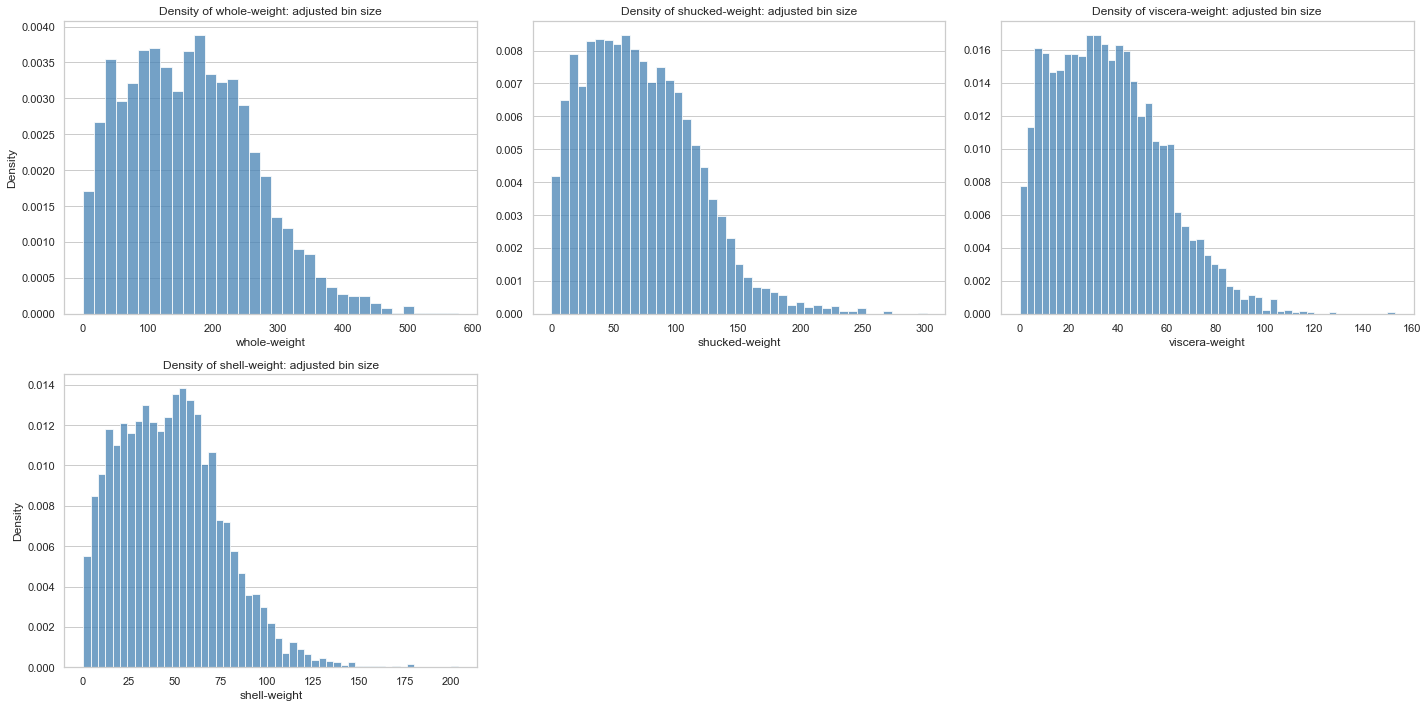

In [14]:
# I am trying out freeman diaconis rule to find optimal binwidth as it is less sensitive to outliers in data
# Reference: https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width
def freeman_diaconis(data):
    quartiles = stats.mstats.mquantiles(data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[0]
    n = len(data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int(h)

weights = ['whole-weight', 'shucked-weight', 'viscera-weight', 'shell-weight']
figure = plt.figure(figsize=(20, 10))
for i, k in enumerate(weights):
    axes = figure.add_subplot(2, 3, i + 1)
    subdata = df[k]
    binwidth = freeman_diaconis(subdata)
    bins = np.arange(min(subdata), max(subdata) + binwidth, binwidth)
    axes.hist(subdata, color="steelblue", bins=bins, density=True, alpha=0.75)
    axes.xaxis.grid(False)
    axes.set_title("Density of {}: adjusted bin size".format(k))
    if (i % 3 == 0):
        axes.set_ylabel("Density")
    axes.set_xlabel(k)
plt.tight_layout()

Indeed distribution is right skewed, and as we expected the histogram of shucked weight, shell weight and viscera weight are similar to whole weight and each other.

We can now expect whole weight to be highly correlated with other weight variables, which doesn't help us much in predicting age.

Now we add new feature weight-diff to further understand if that is how whole weight is calculated, and see if their is anomaly in weight values, we expect weight diff to be vary between positive and zero as it was the mass that was lost during shucking process.

## Anillos

We kind of know rings is a predictor of age, so it is an integer values as they are counted as discrete quantity rather than continuous values, thus we should see discrete distributions with rings, and counts would be more appropriate for Y-axis to plot against.

Now let's start with summary statistics to see what the min and max number of rings are, and where the sample mean lies.

In [15]:
df.rings.describe()


count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: rings, dtype: float64

We can see most of the rings are within 8 and 10, while mean is around 10, and since mean is greater than median, the distribution would be right skewed. Sample variance is smaller, so distribution would be narrower, we can plot a density histogram to verify it.

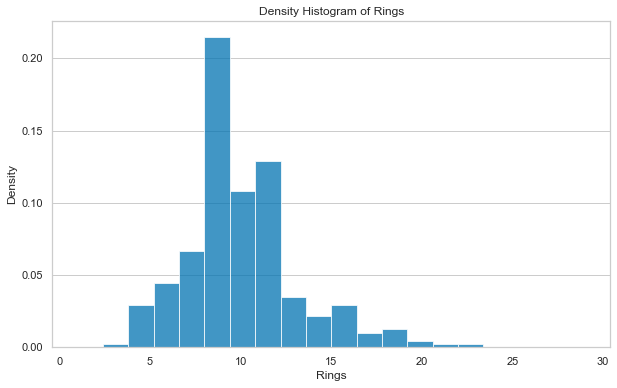

In [16]:
bins = np.arange(min(df.rings), max(df.rings) + binwidth, binwidth)
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(df.rings, bins=20, density=True, alpha=0.75)
axes.set_ylabel("Density")
axes.set_xlabel("Rings")
axes.set_title("Density Histogram of Rings")
axes.xaxis.grid(False)
plt.show()

Indeed, it is as we expected, distribution is right skewed and has less spread, with mean around 10, so the age of abalone would be around 11.5 years.

# Análasis de pares

Before we do pairwise let's see visualize the correlation coefficient matrix as a heat map to understand which pairwise analysis to check.

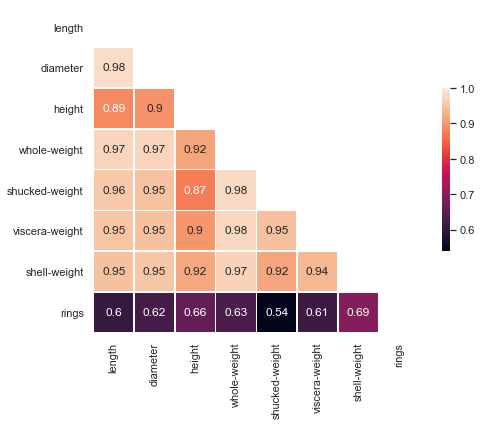

In [17]:
# Taken from the seaborn example at:
# http://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df.corr('spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=1,square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True)
plt.show()
plt.close()

Note that many of the variables are highly correlated with one another with r > 0.7, we can expect the weights to be related to each other as we saw in univariate analysis, but it was unexpected to see the height to be also related with weights, and length and diameter.

We can ignore the other weight variables as they don't give us any new information that we know, we also expect know length, height and diameter to be linearly related, let's focus on:

- height vs. whole weight
- length vs. whole weight
- diameter vs. whole weight.

While there seems to be somewhat a weak correlation between rings and other variables.

# Preprocessing + Training Function

In [18]:
def preprocess_and_train(df, target, task):
    df = df.copy()
    
    # If the sex column is not the target, one-hot encode it
    if target != 'sex':
        dummies = pd.get_dummies(df['sex'])
        df = pd.concat([df, dummies], axis=1)
        df = df.drop('sex', axis=1)
    
    # Split target from df
    y = df[target].copy()
    X = df.drop(target, axis=1).copy()
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    # Define model
    if task == 'regression':
        model = LinearRegression()
    elif task == 'classification':
        model = LogisticRegression()
    
    # Fit model to train set
    model.fit(X_train, y_train)
    
    # Return the test results
    return model.score(X_test, y_test)

# Predicting Sex Column

In [19]:
results = preprocess_and_train(df, target='sex', task='classification')

print("Sex Classification Accuracy: {:.2f}%".format(results * 100))

NameError: name 'LogisticRegression' is not defined

In [ ]:
# Predicting Length Column

In [ ]:
data

In [ ]:
results = preprocess_and_train(df, target='length', task='regression')

print("Length Regression R^2: {:.4f}".format(results))

# Predicting Diameter Column

In [ ]:
data

In [ ]:
results = preprocess_and_train(df, target='diameter', task='regression')

print("Diameter Regression R^2: {:.4f}".format(results))

# Predicting Height Column

In [ ]:
data

In [ ]:
results = preprocess_and_train(df, target='height', task='regression')

print("Height Regression R^2: {:.4f}".format(results))

# Predicting Whole-Weight Column

In [ ]:
data

In [ ]:
results = preprocess_and_train(df, target='whole-weight', task='regression')

print("Whole-Weight Regression R^2: {:.4f}".format(results))

# Predicting Shucked-Weight Column

In [ ]:
data

In [ ]:
results = preprocess_and_train(df, target='shucked-weight', task='regression')

print("Shucked-Weight Regression R^2: {:.4f}".format(results))

# Predicting Viscera-Weight Column

In [ ]:
data

In [ ]:
results = preprocess_and_train(df, target='viscera-weight', task='regression')

print("Viscera-Weight Regression R^2: {:.4f}".format(results))

# Predicting Shell-Weight Column

In [ ]:
data

In [ ]:
results = preprocess_and_train(df, target='shell-weight', task='regression')

print("Shell-Weight Regression R^2: {:.4f}".format(results))

# Predicting Rings Column

In [ ]:
data

In [ ]:
results = preprocess_and_train(df, target='rings', task='regression')

print("Rings Regression R^2: {:.4f}".format(results))

In [ ]:
results = preprocess_and_train(df, target='rings', task='classification')

print("Rings Classification Accuracy: {:.2f}%".format(results * 100))

# Bibliografía

***

El link principal de referencia de Kaggle es: https://www.kaggle.com/hurshd0/abalone-uci

El Dataset fue sacado originalmente del repositorio de UCI Machine Learning: https://archive.ics.uci.edu/ml/datasets/Abalone
